# Understanding Structured Data for Machine Learning

## Upload the file to Google Colab

You can download the train.csv file from https://www.kaggle.com/c/titanic/data

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train.csv to train (2).csv
User uploaded file "train.csv" with length 61194 bytes


In [0]:
!ls

 sample_data  'train (1).csv'   train.csv


## Load the dataset in Pandas DataFrame

In [0]:
import pandas as pd

df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [0]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Downton, Mr. William James",male,1601,G6,S
freq,1,577,7,4,644


In [0]:
# Convert Survived to categorical
df["Survived"] = df["Survived"].astype("int64")

# What do we want to acheive with this data

We want to understand that if a passenger survived, what were the major factors behind it (Feature Selection). We need to find a pattern in the data.

But this is very hard to do just by looking at this plain data.

Lets try visualizing some data and hope we find something interesting.

# Visualizing and Analyzing data

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('bmh')
sns.set()

### Histograms (Bar graphs)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


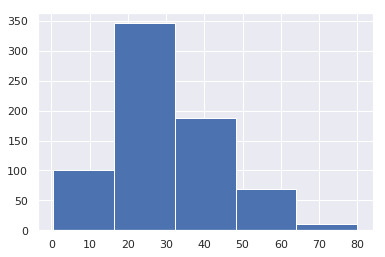

In [0]:
plt.hist(df["Age"], bins=5);

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


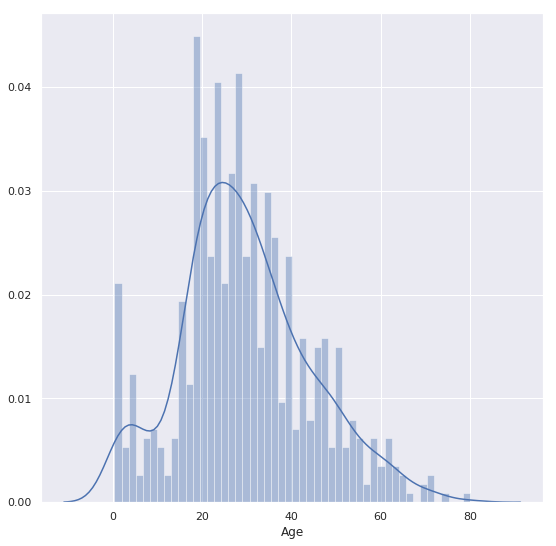

In [0]:
plt.figure(figsize = [9,9])
sns.distplot(df['Age'], bins=50, hist_kws={'alpha': 0.4});

## Histograms of all columns

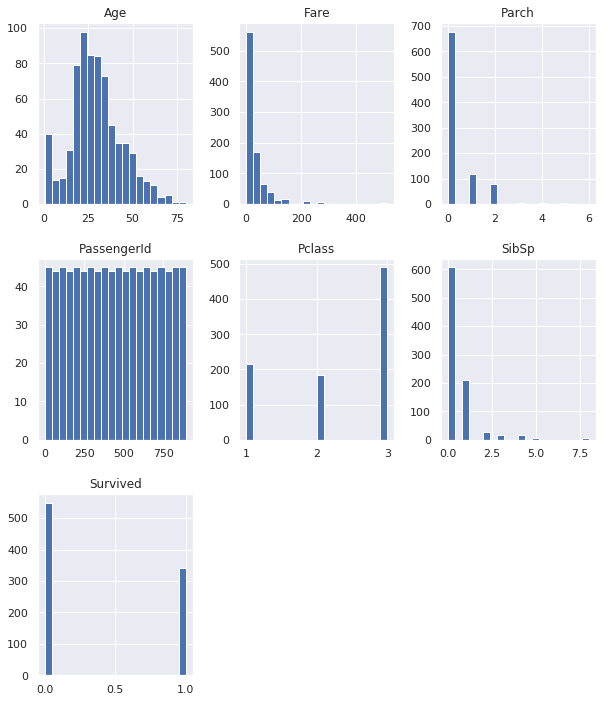

In [0]:
df.hist(figsize=(10, 12), bins=20);

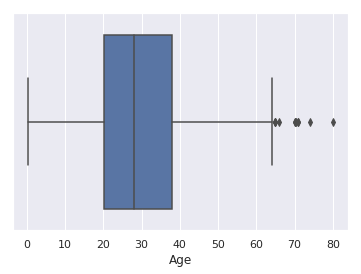

In [0]:
sns.boxplot(df["Age"])

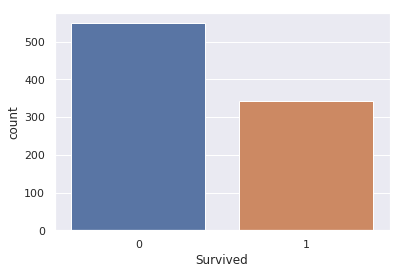

In [0]:
sns.countplot(x='Survived', data=df);

In [0]:
print(f"Percentage of people who did not survive")
print(len(df[df["Survived"] == 0])/len(df))

Percentage of people who did not survive
0.6161616161616161


## Let's consider gender

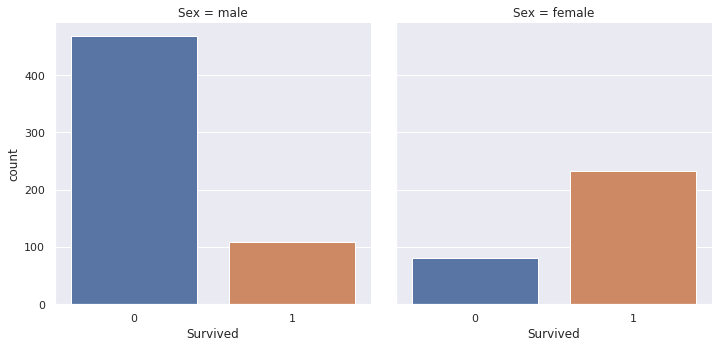

In [0]:
sns.catplot(x='Survived', col='Sex', kind='count', data=df);

In [0]:
print("Female survivors")
print(df[df.Sex == 'female'].Survived.sum()/df[df.Sex == 'female'].Survived.count())
print("\nMale survivors")
print(df[df.Sex == 'male'].Survived.sum()/df[df.Sex == 'male'].Survived.count())

Female survivors
0.7420382165605095

Male survivors
0.18890814558058924


In [0]:
print("If we predict all females as survivors and all males as non-survivors")
(df[df.Sex == 'female'].Survived.sum() + len(df[df.Sex == 'male']) - df[df.Sex == 'male'].Survived.sum())/len(df)

If we predict all females as survivors and all males as non-survivors


0.7867564534231201

## The correlation matrix

Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together.

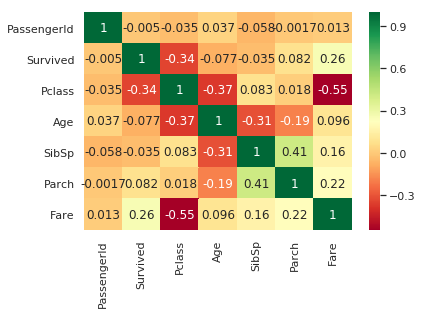

In [0]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")

## Pair plot

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


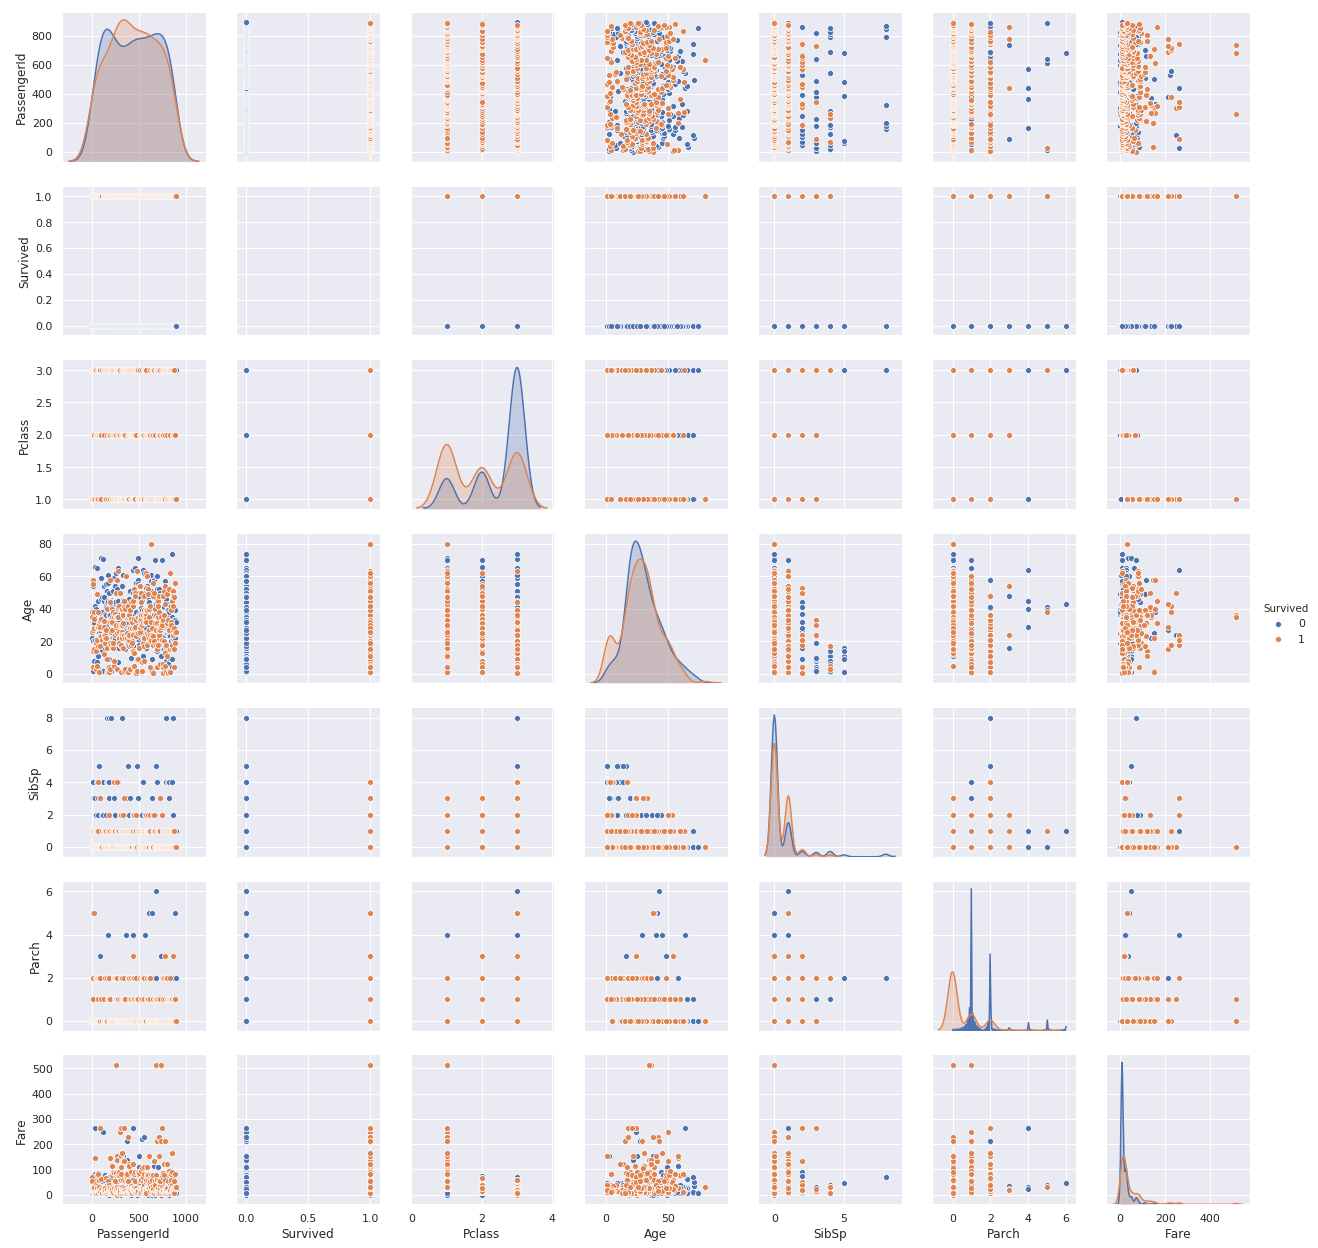

In [0]:
sns.pairplot(df, hue='Survived');

## Let's consider Pclass and Embarked

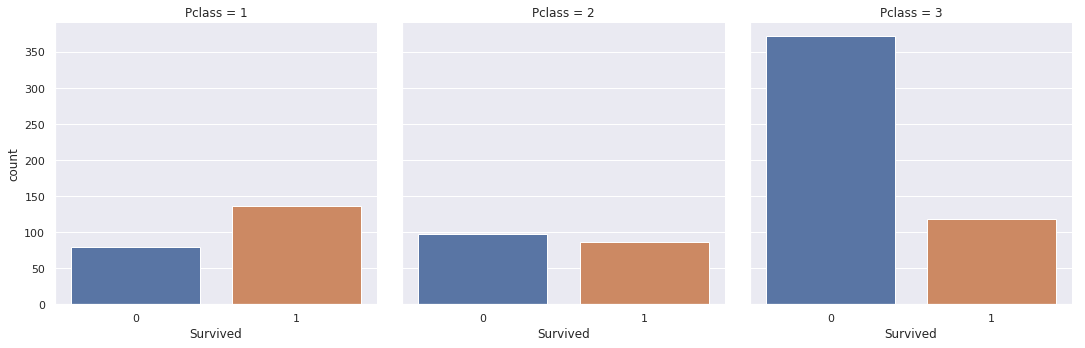

In [0]:
sns.catplot(x='Survived', col='Pclass', kind='count', data=df);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


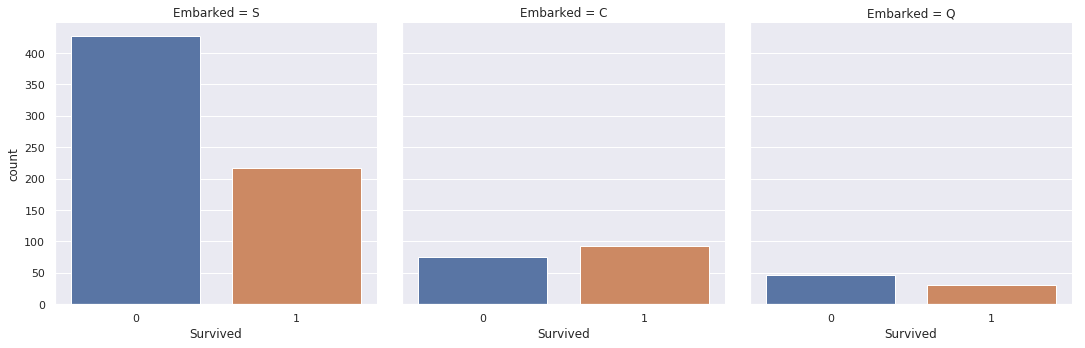

In [0]:
sns.factorplot(x='Survived', col='Embarked', kind='count', data=df);

## Bonus plots

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

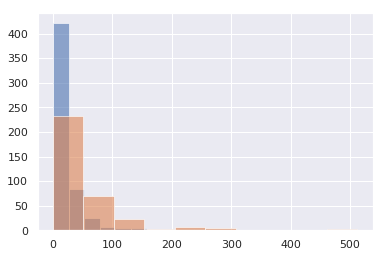

In [0]:
df.groupby('Survived')["Fare"].hist(alpha=0.6)

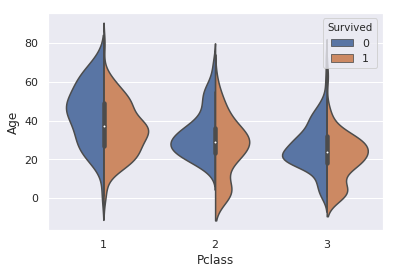

In [0]:
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, split=True)

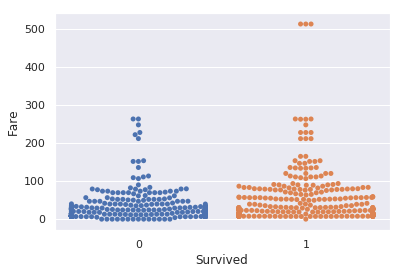

In [0]:
sns.swarmplot(x='Survived', y='Fare', data=df);

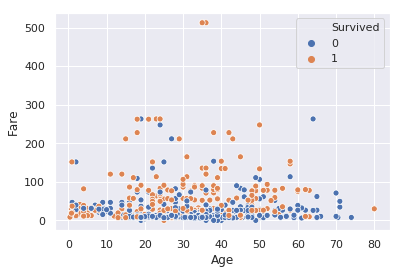

In [0]:
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)

### Be careful with alpha (transparency settings)

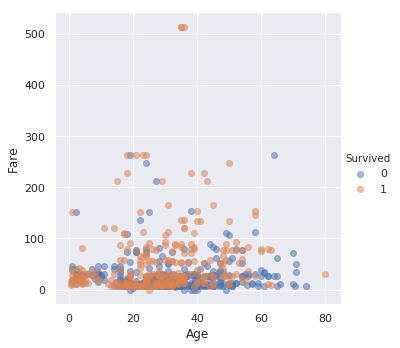

In [0]:
sns.lmplot(x='Age', y='Fare', hue='Survived', data=df, fit_reg=False, scatter_kws={'alpha':0.5});

# Take-aways from EDA

* There were more non-survivors than survivors.
* More females survived than males.
* Most people on ship were young (20-38)
* People travelling in 1st class had more chance of being saved.
* Majority people paid less than $100 for their titanic journey.
* People who purchased costlier tickets had more chance of surviving.
* [Age, Pclass, Fare, sex, Embarked] are useful for prediction. (Probable features)

### Further reading
Pivot table, Contingency table (crosstab)

### More visualization plots
www.datavizproject.com

# Data Wrangling (Cleaning and Preprocessing)

In [0]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [0]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis=1,inplace=True)

df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [0]:
# Dropping Null values

df2 = df.dropna()

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 11 columns):
Survived      714 non-null int64
Pclass        714 non-null int64
Age           714 non-null float64
SibSp         714 non-null int64
Parch         714 non-null int64
Fare          714 non-null float64
Sex_female    714 non-null uint8
Sex_male      714 non-null uint8
Embarked_C    714 non-null uint8
Embarked_Q    714 non-null uint8
Embarked_S    714 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 42.5 KB


In [0]:
# Imputing Null Values

df.fillna(df.mean(), inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB


In [0]:
# Normalizing (Scaling)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_train = df.drop('Survived',axis=1)

scaler.fit(df_train)

scaled_features = scaler.transform(df_train)
target = df["Survived"]

scaled_features[:5]

array([[ 0.82737724, -0.5924806 ,  0.43279337, -0.47367361, -0.50244517,
        -0.73769513,  0.73769513, -0.48204268, -0.30756234,  0.61930636],
       [-1.56610693,  0.63878901,  0.43279337, -0.47367361,  0.78684529,
         1.35557354, -1.35557354,  2.0745051 , -0.30756234, -1.61470971],
       [ 0.82737724, -0.2846632 , -0.4745452 , -0.47367361, -0.48885426,
         1.35557354, -1.35557354, -0.48204268, -0.30756234,  0.61930636],
       [-1.56610693,  0.40792596,  0.43279337, -0.47367361,  0.42073024,
         1.35557354, -1.35557354, -0.48204268, -0.30756234,  0.61930636],
       [ 0.82737724,  0.40792596, -0.4745452 , -0.47367361, -0.48633742,
        -0.73769513,  0.73769513, -0.48204268, -0.30756234,  0.61930636]])

In [0]:
target

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Now this data is ready to be fed into a Machine Learning model